In [ ]:
# Standard Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

# Stats
import scipy.stats as stats

This data was obtained from [Kaggle](https://www.kaggle.com/datasets/sumansharmadataworld/depression-surveydataset-for-analysis). It is "part of a comprehensive survey aimed at understanding the factors contributing to depression risk among adults." The information was collected from January 2023 - June 2023.

In [107]:
df = pd.read_csv('data/depression_data.csv')
df.head()

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Pooja,Female,37,Ghaziabad,Working Professional,Teacher,NaN,2.0,NaN,NaN,4.0,7-8 hours,Moderate,MA,No,6,2,No,No
1,Reyansh,Male,60,Kalyan,Working Professional,Financial Analyst,NaN,4.0,NaN,NaN,3.0,5-6 hours,Unhealthy,B.Com,Yes,0,4,Yes,No
2,Manvi,Female,42,Bhopal,Working Professional,Teacher,NaN,2.0,NaN,NaN,3.0,5-6 hours,Moderate,M.Com,No,0,2,No,No
3,Isha,Female,44,Thane,Working Professional,Teacher,NaN,3.0,NaN,NaN,5.0,7-8 hours,Healthy,MD,Yes,1,2,Yes,No
4,Aarav,Male,48,Indore,Working Professional,UX/UI Designer,NaN,4.0,NaN,NaN,3.0,7-8 hours,Moderate,BE,Yes,6,5,Yes,No


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Name                                   2556 non-null   object 
 1   Gender                                 2556 non-null   object 
 2   Age                                    2556 non-null   int64  
 3   City                                   2556 non-null   object 
 4   Working Professional or Student        2556 non-null   object 
 5   Profession                             1883 non-null   object 
 6   Academic Pressure                      502 non-null    float64
 7   Work Pressure                          2054 non-null   float64
 8   CGPA                                   502 non-null    float64
 9   Study Satisfaction                     502 non-null    float64
 10  Job Satisfaction                       2054 non-null   float64
 11  Slee

In [109]:
df.isna().sum()

Name                                        0
Gender                                      0
Age                                         0
City                                        0
Working Professional or Student             0
Profession                                673
Academic Pressure                        2054
Work Pressure                             502
CGPA                                     2054
Study Satisfaction                       2054
Job Satisfaction                          502
Sleep Duration                              0
Dietary Habits                              0
Degree                                      0
Have you ever had suicidal thoughts ?       0
Work/Study Hours                            0
Financial Stress                            0
Family History of Mental Illness            0
Depression                                  0
dtype: int64

In [110]:
df.describe()

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress
count,2556.000000,502.000000,2054.000000,502.000000,502.000000,2054.000000,2556.000000,2556.000000
mean,39.043036,3.003984,3.021908,7.567809,3.075697,3.015093,6.023865,2.968701
std,12.260596,1.390007,1.417312,1.465367,1.373490,1.418432,3.771743,1.415527
min,18.000000,1.000000,1.000000,5.030000,1.000000,1.000000,0.000000,1.000000
25%,28.000000,2.000000,2.000000,6.210000,2.000000,2.000000,3.000000,2.000000
50%,39.000000,3.000000,3.000000,7.605000,3.000000,3.000000,6.000000,3.000000
75%,50.000000,4.000000,4.000000,8.825000,4.000000,4.000000,9.000000,4.000000
max,60.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,5.000000


In [111]:
df.describe(include='object')

,Name,Gender,City,Working Professional or Student,Profession,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Family History of Mental Illness,Depression
count,2556,2556,2556,2556,1883,2556,2556,2556,2556,2556,2556
unique,216,2,30,2,35,4,3,27,2,2,2
top,Rohan,Male,Srinagar,Working Professional,Teacher,7-8 hours,Unhealthy,Class 12,No,No,No
freq,26,1333,102,2054,322,658,882,275,1307,1311,2101


* This data contains 2,556 survey responses on 19 metrics. Some of these include age, city, hours of sleep, diet, financial stress, family history of illness, and the target variable, depression.
* There is a mix of string and numeric data.
* There is null data is several categories which might mean that the respondent did not want to volunteer that information or that the question did not apply to them.

Descriptive stats of numeric data:
* The average age of respondents is 39.
* Academic and work pressure both average 3 out of 5.
* Similarly, study satisfaction and job satisfaction are 3 out of 5.
* CGPA is a metric that quantifies satisfaction with healthcare services. The range is 1-10 and average response is 7.6.
* Most individuals surveyed work/study for approximately 6 hours per day, while the maximum is 12.
* Individuals of this suvery do not generally experience financial stress, with an average of ~3.

Descriptive stats of string-type data (most common responses):
* A little over half of respondents are males
* Teacher as profession
* 7-8 hours of sleep per night
* Classify their diet as "unhealthy"
* High school graduates
* A little over half have had suicidal thoughts at least once and report family history of mental illness
* Large majority (82%) are not at risk of depression.

Before jumping into analysis let's standardize the naming convention of the columns to make the data easier to work with.

In [112]:
df.columns

Index(['Name', 'Gender', 'Age', 'City', 'Working Professional or Student',
       'Profession', 'Academic Pressure', 'Work Pressure', 'CGPA',
       'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration',
       'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?',
       'Work/Study Hours', 'Financial Stress',
       'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [113]:
# Drop ? from naming convention and replace spaces with underscores.
# Also make all columns lower case
df.columns = [column.replace(' ?', '').replace(' ', '_').lower() for column in df.columns]

df.drop(columns=['name'], inplace=True)

In [114]:
df.columns

Index(['gender', 'age', 'city', 'working_professional_or_student',
       'profession', 'academic_pressure', 'work_pressure', 'cgpa',
       'study_satisfaction', 'job_satisfaction', 'sleep_duration',
       'dietary_habits', 'degree', 'have_you_ever_had_suicidal_thoughts',
       'work/study_hours', 'financial_stress',
       'family_history_of_mental_illness', 'depression'],
      dtype='object')

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'academic_pressure'}>,
        <Axes: title={'center': 'work_pressure'}>],
       [<Axes: title={'center': 'cgpa'}>,
        <Axes: title={'center': 'study_satisfaction'}>,
        <Axes: title={'center': 'job_satisfaction'}>],
       [<Axes: title={'center': 'work/study_hours'}>,
        <Axes: title={'center': 'financial_stress'}>, <Axes: >]],
      dtype=object)

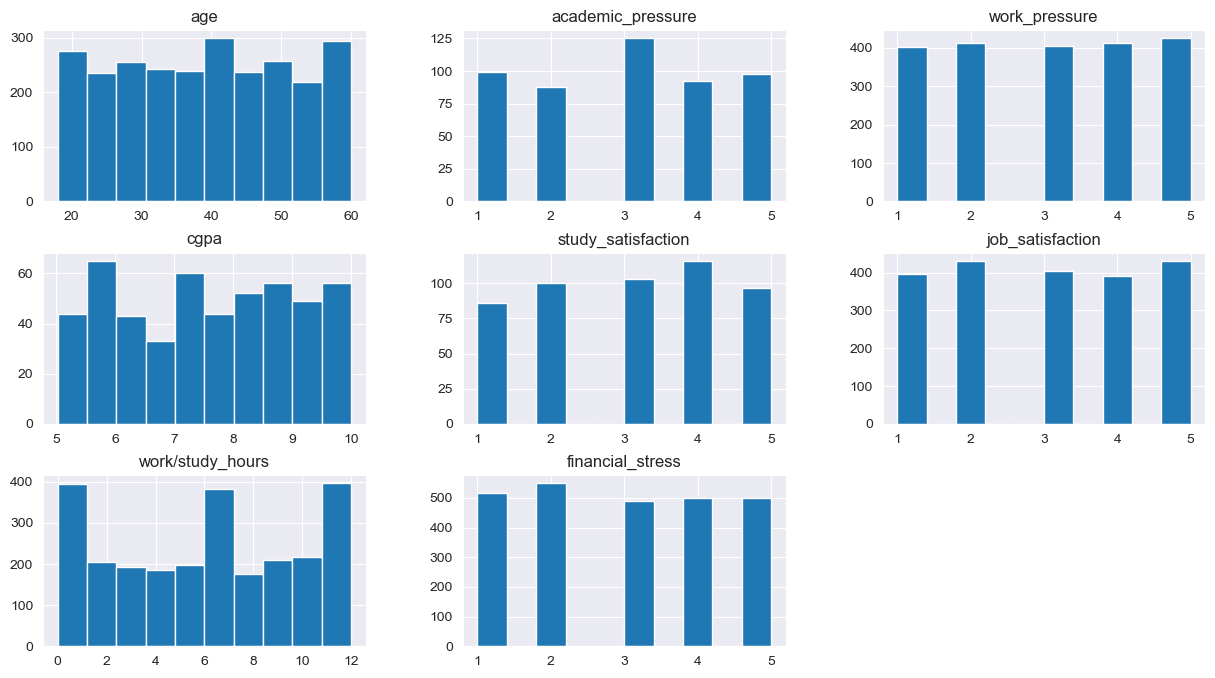

In [115]:
# Check distribution of data for numeric columns
df.hist(figsize=(15, 8))

Here we see:
* Near-uniform distributions across age, work pressure, study satisfaction, job satisfaction, and financial stress.
* Academic pressure is closer to a normal distribution
* CGPA shows a slightly skewed distribution
* work/study hours shows an abnormal distribution.

I'd be curious to investigate how the extreme values may relate to depression.

In [116]:
cat_cols = df.select_dtypes('object').columns

In [117]:
cat_df = df[cat_cols]

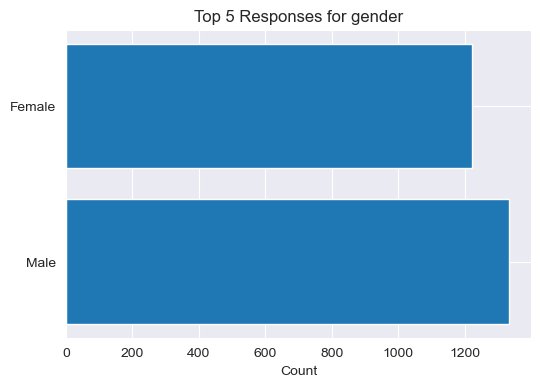

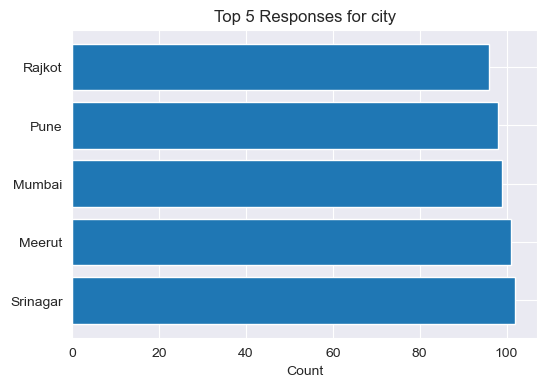

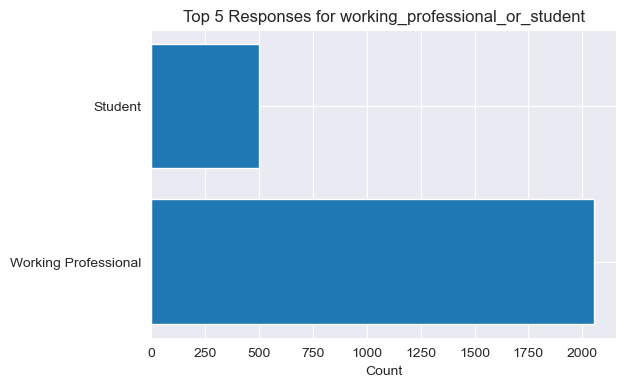

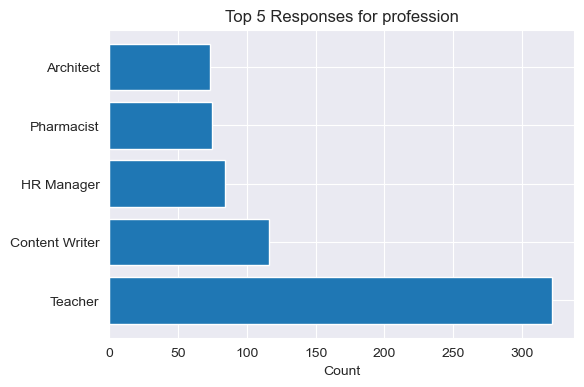

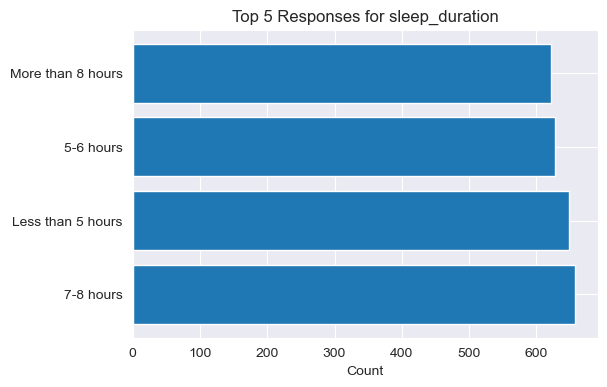

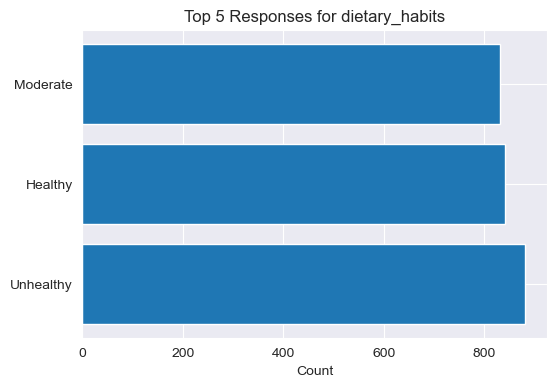

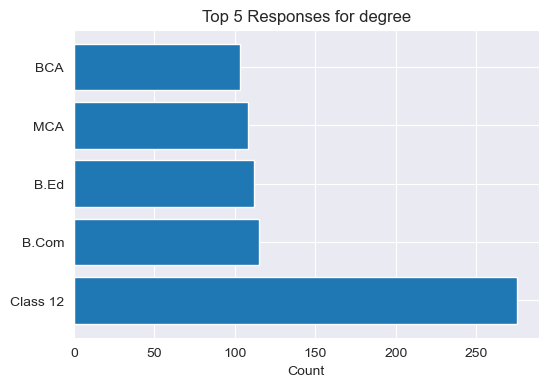

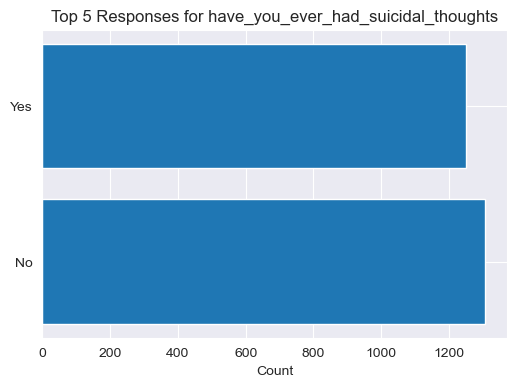

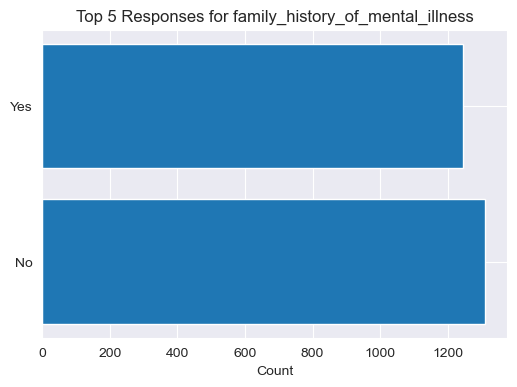

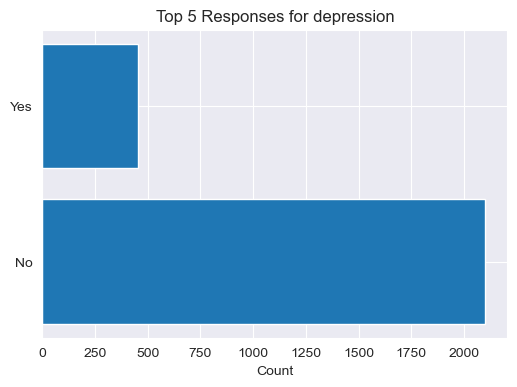

In [118]:
for column in cat_cols:
    data = df[column].value_counts().head()
    x = data.index
    y = data.values

    plt.figure(figsize=(6, 4))
    plt.barh(x, y)
    plt.title(f"Top 5 Responses for {column}")
    plt.xlabel('Count')
    plt.show();

These are the top 5 responses for each categorical column. Here we see :
* A near-uniform distribution across gender, top 5 cities, sleep duration, dietary habits, previous thoughts of suicide, and family history of mental illness.
* A large majority of working professionals compared to students
* Many more teachers than the next highest profession.
* Many more high school graduates than other classes of education. This is not super surprising as this is the required level of schooling in many countries wheras additional education is optional.
* There is a strong class imbalance in favor of individuals who are **not** at risk of depression.

## Respondents by Risk of Depression

Now that we have an understanding of the distribution of responses from all survery participants, let's explore differences between those at risk for depression vs those that are not.

In [119]:
df['depression'].value_counts()

depression
No     2101
Yes     455
Name: count, dtype: int64

In [120]:
at_risk_df = df.loc[df['depression'] == 'Yes']
at_risk_df.describe()

,age,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,work/study_hours,financial_stress
count,455.000000,252.000000,203.000000,252.000000,252.000000,203.000000,455.000000,455.000000
mean,26.263736,3.662698,3.866995,7.632937,2.674603,2.300493,7.259341,3.472527
std,6.881686,1.227717,1.237630,1.455422,1.343892,1.347293,3.572841,1.374249
min,18.000000,1.000000,1.000000,5.030000,1.000000,1.000000,0.000000,1.000000
25%,21.000000,3.000000,3.000000,6.250000,1.750000,1.000000,4.000000,2.000000
50%,25.000000,4.000000,4.000000,7.810000,3.000000,2.000000,8.000000,4.000000
75%,30.000000,5.000000,5.000000,8.860000,4.000000,3.000000,10.000000,5.000000
max,51.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,5.000000


In [121]:
not_at_risk_df = df.loc[df['depression'] == 'No']
not_at_risk_df.describe()

,age,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,work/study_hours,financial_stress
count,2101.000000,250.000000,1851.000000,250.000000,250.00000,1851.000000,2101.000000,2101.000000
mean,41.810566,2.340000,2.929227,7.502160,3.48000,3.093463,5.756307,2.859591
std,11.384505,1.219158,1.405343,1.475326,1.28382,1.404401,3.761157,1.400949
min,18.000000,1.000000,1.000000,5.060000,1.00000,1.000000,0.000000,1.000000
25%,33.000000,1.000000,2.000000,6.115000,3.00000,2.000000,2.000000,2.000000
50%,43.000000,2.000000,3.000000,7.460000,4.00000,3.000000,6.000000,3.000000
75%,51.000000,3.000000,4.000000,8.762500,5.00000,4.000000,9.000000,4.000000
max,60.000000,5.000000,5.000000,10.000000,5.00000,5.000000,12.000000,5.000000


Between the at-risk group and the non-risk group we see:
* A rather large difference in age, with at-risk respondents 16 years younger on average
* At-risk individual face increased academic and work pressure on average with the median showing an even larger gap.
* Satisfaction with the survey and with their own jobs are both lower in the at-risk group.
* At-risk respondents report working/studying 1.5 hours more on average with the median being 2 hours more.
* Financial stress is more prevalant in the at-risk group.

It will be interesting to see if these differences are statistically significant. Let's set up paired t-tests to compare the groups. ***Because the ttest_ind from Scipy Stats assumes equal variance***, we first need to use Levene's test to make sure we use this test appropriately.

In [128]:
df.isna().sum()

gender                                    0
age                                       0
city                                      0
working_professional_or_student           0
profession                              673
academic_pressure                      2054
work_pressure                           502
cgpa                                   2054
study_satisfaction                     2054
job_satisfaction                        502
sleep_duration                            0
dietary_habits                            0
degree                                    0
have_you_ever_had_suicidal_thoughts       0
work/study_hours                          0
financial_stress                          0
family_history_of_mental_illness          0
depression                                0
dtype: int64

In [ ]:
# H0: Variances are equal
# H1: Variances are not equal
alpha = 0.05

# Isolate numeric columns and apply Levene's test of equal variance
num_cols = at_risk_df.select_dtypes(include='number').columns

for column in num_cols:
    # Drop nulls so they don't interfere with results
    group_1 = at_risk_df[column].dropna()
    group_2 = not_at_risk_df[column].dropna()

    stat, p_value = stats.levene(group_1, group_2)

    if p_value > alpha:
        print(f"{column}: Equal variances.")
    else:
        print(f"{column}: Different variance.")

age: Different variance.
academic_pressure: Equal variances.
work_pressure: Different variance.
cgpa: Equal variances.
study_satisfaction: Equal variances.
job_satisfaction: Different variance.
work/study_hours: Different variance.
financial_stress: Equal variances.


Great! Now that we know which columns have equal variances and which ones don't we can effectively apply ttest_ind from Scipy Stats.

In [134]:
diff_var_cols = [
    'age',
    'work_pressure',
    'job_satisfaction',
    'work/study_hours'
]

equal_var_cols = [
    'academic_pressure',
    'cgpa',
    'study_satisfaction',
    'financial_stress'
]

In [ ]:
help(ttest_ind)

Help on function ttest_ind in module scipy.stats._stats_py:

ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate', permutations=None, random_state=None, alternative='two-sided', trim=0)
    Calculate the T-test for the means of *two independent* samples of scores.
    
    This is a test for the null hypothesis that 2 independent samples
    have identical average (expected) values. This test assumes that the
    populations have identical variances by default.
    
    Parameters
    ----------
    a, b : array_like
        The arrays must have the same shape, except in the dimension
        corresponding to `axis` (the first, by default).
    axis : int or None, optional
        Axis along which to compute test. If None, compute over the whole
        arrays, `a`, and `b`.
    equal_var : bool, optional
        If True (default), perform a standard independent 2 sample test
        that assumes equal population variances [1]_.
        If False, perform Welch's t-test, which

In [137]:
# H0: There is no significant difference in the average value for the given column among at-risk and not-at-risk groups.
# H1: There is a significant difference in the average value for the given column between at-risk and not-at-risk groups.

alpha = 0.05

for column in diff_var_cols:
    group_1 = at_risk_df[column].dropna()
    group_2 = not_at_risk_df[column].dropna()

    stat, p_value = stats.ttest_ind(group_1, group_2, equal_var=False)

    if p_value < alpha:
        print(f"{column}: Reject the null: There is a significant difference between average values.")
    else:
        print(f"{column}: Fail to reject the null: No significant difference between average values.")

age: Reject the null: There is a significant difference between average values.
work_pressure: Reject the null: There is a significant difference between average values.
job_satisfaction: Reject the null: There is a significant difference between average values.
work/study_hours: Reject the null: There is a significant difference between average values.


In [139]:
# H0: There is no significant difference in the average value for the given column among at-risk and not-at-risk groups.
# H1: There is a significant difference in the average value for the given column between at-risk and not-at-risk groups.

alpha = 0.05

for column in equal_var_cols:
    group_1 = at_risk_df[column].dropna()
    group_2 = not_at_risk_df[column].dropna()

    stat, p_value = stats.ttest_ind(group_1, group_2, equal_var=True)

    if p_value < alpha:
        print(f"{column}: Reject the null: There is a significant difference between average values.")
    else:
        print(f"{column}: Fail to reject the null: No significant difference between average values.")

academic_pressure: Reject the null: There is a significant difference between average values.
cgpa: Fail to reject the null: No significant difference between average values.
study_satisfaction: Reject the null: There is a significant difference between average values.
financial_stress: Reject the null: There is a significant difference between average values.


Wow! Between the at-risk group and the not-at-risk group we are seeing that the average value for each of the numeric columns is significantly different, with the exception of the cgpa column, which is not significantly different.